In [1]:
from IPython.display import Image
%matplotlib inline

## get the table

In [2]:
import pandas as pd

df1 = pd.read_csv('data/input/38bldgs_survey_2013.csv',
#                  index_col='dataid',
                 header='infer',
                 sep=',')

df1.dtypes;

df1.shape

df1.dropna(axis=1,how='all');
# drop the columns where all values are null

df1 = df1.drop_duplicates(subset='dataid', keep='first')

df1.shape

range1 = lambda start, end: range(start, end+1)

list1 = [1] + list(range1(3,4)) + [22, 23, 37, 39, 41, 42, 43, 45, 46] + list(range1(60,67)) + [76] + list(range1(87,101)) \
            + [108, 110, 113, 115, 120, 122, 124, 129, 131, 132, 133] + list(range(135, 168, 2)) + list(range1(174,177)) \
             + [182] 
# list of columns to be dropped due to these columns simply do not make sense       

df1 = df1.drop(df1.columns[list1], axis=1)

df1.shape

pd.set_option('display.max_rows', 200)
# set the max rows can be displayed as 200

list11 = [1,2,3,4,7]
# list of columb to be dropped due to overlap between audits table and survey table

df1 = df1.drop(df1.columns[list11], axis=1)

df1.dropna(axis=1,how='all');
# drop the columns where all values are null

# df1.to_csv('data/test.csv', sep=',')

df1.shape

list12 = list(range1(3,13)) + list(range1(24,45)) + list(range1(49,59)) + list(range1(61,66)) + [73,75] \
           + list(range1(77,81)) + list(range1(99,104))
 
# list of columns to get dummied

df_1 = pd.get_dummies(df1[list12])
# convert the nominal categorical features

df_1.shape
# size of the data framwork with dummy features

df_1.dtypes;

list13 = [14, 15, 46] + list(range1(82,98)) + list(range1(105,108))
# list of column to be converted 

df_11 = df1[list13].apply(pd.to_numeric, errors='coerce')
# convert the ordinal categorical features

df_11.dtypes;

df_11.shape
# size of the data framwork with converted features

df1.dtypes;
# check data types of df1 before converting

list14 = list12 + list13
# get the combined list of the columns that have been dummied and have been converted

df1 = df1.drop(df1.columns[list14], axis=1)
# reduce the dummy and converted columns from the original data framework

df1.shape
# size of the new dataframe 

df1 = pd.concat([df1, df_1], axis=1)

df1 = pd.concat([df1, df_11], axis=1)

df1.shape

df1.dtypes;

df1.head();

df1.fillna(0, inplace=True)

df1.head()

df1.shape

(38, 172)

In [3]:
import pandas as pd

df2 = pd.read_csv('data/input/38bldgs_audits_2013.csv',
#                  index_col='dataid',
                 header='infer',
                 sep=',')

df2.shape

df2.head();

range2 = lambda start, end: range(start, end+1)

list2 = list(range2(1,4)) + [8] + [12, 13] + [19, 20] + [27, 30, 47, 49, 57, 58, 59, 61, 63, 66, 68, 69, 70] + list(range2(74,77))
# list of columns to be dropped     

list2;

df2 = df2.drop(df2.columns[list2], axis=1)

df2.shape

df2.dtypes;

df2.head()

df2.shape

list22 = [6, 7, 8, 51]
# list of column to be get dummied

df_2 = pd.get_dummies(df2[list22])

df_2.head();

df_2.shape

df2 = df2.drop(df2.columns[list22], axis=1)

df2.shape

df2 = pd.concat([df2, df_2], axis=1)

df2.shape

df2.head()

df2.dtypes;

df2.fillna(0, inplace=True)

df2.head();

df2.shape

(38, 67)

In [4]:
df12 = pd.merge(df1, df2, on='dataid', how='left')

df12.shape

df12;

df12.isnull().sum();
# show the number of null values in each column

df12.head();

df12.shape

(38, 238)

In [5]:
import pandas as pd

df1 = pd.read_csv('data/input/38bldgs_electricity_egauage_hours_2014.csv',
#                 index_col= ['dataid','localhour'],
                 index_col= 'dataid',
                 header='infer',
                 sep=',')

df1.shape

df1.dropna(axis=1,how='all');
# drop the columns where all values are null

df1.head();

df1['electricity_consumption'] = df1.sum(axis=1)

df_1 = df1[['localhour', 'electricity_consumption']].copy()

df_1.shape

# df_11 = df_1.reset_index(level='dataid')
# reset the dataid as column instead of index for the sake of join

df_1.head()

import pandas as pd

df2 = pd.read_csv('data/input/weather_hours_2014.csv',
#                index_col='localhour',
                 header='infer',
                 sep=',')

df2.shape

df2.dropna(axis=1,how='all');
# drop the columns where all values are null

df2.median();
df_2 = df2.fillna(df2.median())

df_2.fillna(0, inplace=True)
# set the null value to zero

df_2.shape

# df_22 = df_2.reset_index(level='localhour')
# reset the dataid as column instead of index for the sake of drop duplicate

df_2 = df_2.drop_duplicates(subset='localhour', keep='first');
# drop duplicate tuples based on localhour column

df_2.shape

df_2.head()

df_1 = df_1.reset_index(level='dataid');
# reset the dataid as column instead of index for the sake of join

df_1.head()

df_1['localhour']  = pd.to_datetime(df_1['localhour'])

df_2['localhour']  = pd.to_datetime(df_2['localhour'])

df_a = pd.merge(df_1, df_2, on='localhour', how='left')

df_a.shape

df_a.head()

df_a = df_a.fillna(df_a.median())

df_a.isnull().sum();
# show the number of null values in each column

df_a.shape

(314121, 30)

In [6]:
df = pd.merge(df_a, df12, on='dataid', how='left')

df.shape

df.head()

df  =  df.drop(['summary','precip_type'], 1)

df_reserve = df

df.isnull().sum()
# show the number of null values in each column

df.dtypes;

df.shape

(314121, 265)

## feature importance in random forest

In [7]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [8]:
df = df_reserve.drop(['localhour','dataid'], axis =1)

In [9]:
df.head();

In [10]:
df.shape

(314121, 263)

In [11]:
# choose one row every 50 row to randomly get a new dataframe for analysis to reduce the computation load
df = df.iloc[::50, :]

In [12]:
# randomly choose 5000 rows to get a new dataframe - group the data by temperature, choose 3 from each group
# df = df.sample(frac=1).groupby('latitude', sort=False).head(2000)

In [13]:
df.shape

(6283, 263)

In [14]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
feat_labels = df.columns[1:]

forest = RandomForestRegressor(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

In [16]:
plot1 = pd.DataFrame(data=importances,index=feat_labels)

In [17]:
plot1 = plot1.transpose()

In [18]:
plot1

,latitude,longitude,tz_offset,ozone,ozone_error,temperature,temperature_error,dew_point,dew_point_error,humidity,...,Foundation_Type__c_Pier and Beam,Foundation_Type__c_Slab,Foundation_Type__c_Slab;Pier and Beam,Type_of_Home__c_Apartment,Type_of_Home__c_Single-Family,Type_of_Home__c_Town Home,Distance_From_Neighbors__c_0,Distance_From_Neighbors__c_10,Distance_From_Neighbors__c_15,Distance_From_Neighbors__c_>= 20
0,0.000724,0.000917,0.006137,0.043519,0.0,0.06398,0.0,0.061288,0.0,0.048681,...,0.000099,0.000183,0.000061,0.00017,0.000279,0.000196,0.000442,0.000869,0.000928,0.000406


In [19]:
plot1 = plot1.sort_values(by=0, ascending=False, axis=1)
# sort the first row by means of ascending

In [20]:
plot1

,apparent_temperature,House_Volume_Cubic_Footage__c,pressure,wind_bearing,wind_speed,temperature,dew_point,humidity,cloud_cover,ozone,...,cloud_cover_error,precip_intensity_error,residents_19_to_24,Number_of_Manual_Thermostats__c,heating_none,Number_of_Heat_Recovery_Systems__c,Number_of_Gas_Space_Heaters__c,Number_of_Wall_Furnaces__c,hvac_no_ac,hvac_geothermal_heat_pump
0,0.140142,0.109344,0.07271,0.066081,0.065393,0.06398,0.061288,0.048681,0.043632,0.043519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# save the csv file that have all feature importance information for random forest algorithms
plot1.to_csv('data/output/feature_importances_random_forest.csv')

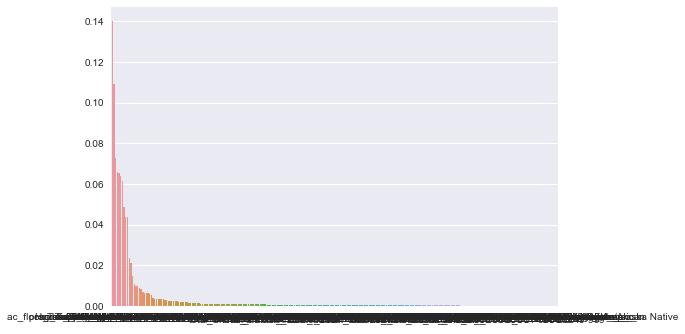

In [22]:
ax = sns.barplot(data=plot1);
# plot the factors as bar chart

,apparent_temperature,House_Volume_Cubic_Footage__c,pressure,wind_bearing,wind_speed,temperature,dew_point,humidity,cloud_cover,ozone,Construction_Year__c,visibility,appliance_hairdryer_daily basis,Total_Window_Square_Footage_W__c,precip_intensity,precip_probability,electric_ovenrange_number,Total_Window_Square_Footage_S__c,modify_routines_Yes,television_number
0,0.140142,0.109344,0.07271,0.066081,0.065393,0.06398,0.061288,0.048681,0.043632,0.043519,0.023636,0.021052,0.014489,0.01067,0.009923,0.009534,0.008813,0.008275,0.006841,0.00639


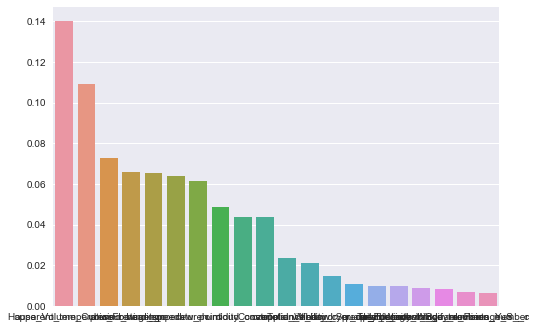

In [24]:
plot2 = plot1.ix[:,0:20]
# select the first 20 columns in the table (20 factors that have greatest impact on y when using random forest regression)
# note that the first column should be excluded because it is itself

# save the csv file that have top 20 important features for random forest
plot2.to_csv('data/output/top20_important_feature_random_forest.csv')

ax = sns.barplot(data=plot2)
# plot the first 10 columns that are positively related to y

plot2